In [3]:
# Import torch
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from helper_functions import *
# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Important Pytorch CV Libraries
1. Torchvision->everything from architecture, image transforms, etc.
2. torchvision.datasets->example datasets
3. torchvisio.models->example well performing models
4. torchvision.transforms->augment or processing images
5. torch.utils.data.datasets->base dataset class
6. torch.utils.daa.DataLoader->makes iterable over a dataset

# FashionMNIST dataset

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="/app/dataset", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="/app/dataset",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
# The shape is 1, 28 28 which means 1 color depth, 28x28 pixels
image.shape

torch.Size([1, 28, 28])

In [7]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [8]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

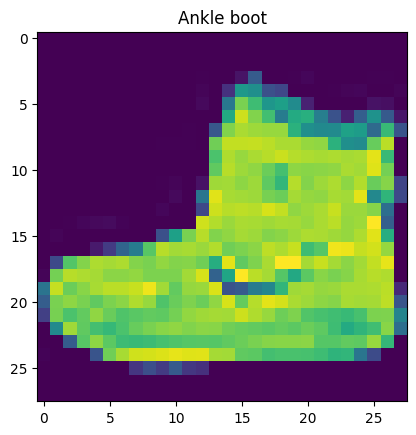

In [9]:
# visualize the shoe
plt.imshow(image[0])
plt.title(train_data.classes[label])

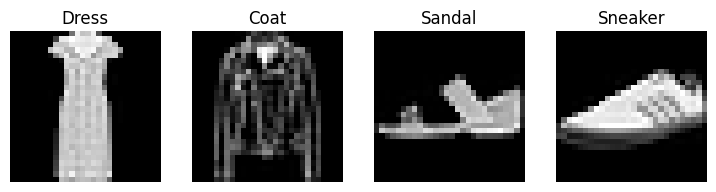

In [10]:
# have more
fig = plt.figure(figsize=(9, 9))
for i in range(1, 4*1+1):
    randomId=torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[randomId]
    fig.add_subplot(4, 4, i)
    # set colormap to grey
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(train_data.classes[label])
    plt.axis(False)

# Dataloader
Loads data to a model
Turns dataset to smaller chunks(batches)

But WHY?

Its more computationally efficient to break it up, so more gradient descent is oerformed

In [11]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fa7e264ef90>, <torch.utils.data.dataloader.DataLoader object at 0x7fa7e251c610>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [12]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

it still stays the same, dont worry!

# The Flatten Layer

In [13]:
# We introduce a new layer, called flatten
flattenLayer=torch.nn.Flatten()
x=train_features_batch[0]
output=flattenLayer(x)

# as discussed before, the shape is channel, width, height
# imagine it like a 3d cube i guess where 1 is the depth
print(x.shape)
# flatten just multiplies width and height which is useful for input layers
print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


Now the tutorial said to use a linear and a nonlinear layers, but we're just gonna skip that e=because the main star of the show is convolutions

CNN's are known to find various patterns in  visual data, since we're dealing with it, it can improve rather than using just a regular linear or nonlinear layers(more on that on the conv notebook whichisWIPdontaskmeforit)

The architecture we're gonna be building looks like this

Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer

where the hidden layers could be repeated as necessary

Also, be aware of additional problem and their specific model types that fit
1. Structured Data(excel, row and col data)
   - Gradient Models
   - Random Forest
   - XGBoost
2. Unstructured data(image, audio, language)
   - Convolutional Neural Networks
   - Transformers

In [14]:
class FashionMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
            # NONLINEAR CONFIG
        # self.layer_stack = nn.Sequential(
        #     torch.nn.Flatten(), # flatten inputs into single vector
        #     torch.nn.Linear(in_features=input_shape, out_features=hidden_units),
        #     torch.nn.ReLU(),
        #     torch.nn.Linear(in_features=hidden_units, out_features=output_shape),
        #     torch.nn.ReLU()
        # )
            # CONVOLUTION CONFIG
        self.block_1 = nn.Sequential(
           torch.nn.Conv2d(in_channels=input_shape, 
                     out_channels=hidden_units, 
                     kernel_size=3, # how big is the square that's going over the image?
                     stride=1, # default
                     padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
           torch.nn.ReLU(),
           torch.nn.Conv2d(in_channels=hidden_units, 
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
           torch.nn.ReLU(),
           torch.nn.MaxPool2d(kernel_size=2,stride=2)) # default stride value is same as kernel_size
        
        self.block_2 = nn.Sequential(
           torch.nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
           torch.nn.ReLU(),
           torch.nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
           torch.nn.ReLU(),
           torch.nn.MaxPool2d(2))
        
        self.classifier = nn.Sequential(
           torch.nn.Flatten(),
           # Where did this in_features shape come from? 
           # It's because each layer of our network compresses and changes the shape of our input data.
           torch.nn.Linear(in_features=hidden_units*7*7, 
                     out_features=output_shape))
        
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        # return self.layer_stack(x)
        return x


## Short about  Convolutions

Convolutions slides a kernel(just another matrix) on your image, then multiplies each pairwise and adds em up!

Several notes about it:
1. Kernel->size of the matrix
2. Stride->how much do we skip on each slide
3. Padding->add image padding, better performance

In [15]:


torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
conv_layer = torch.nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
conv_layer(test_image)
print("comparison of shapes")
print(test_image.unsqueeze(dim=0).shape)
print(conv_layer(test_image.unsqueeze(dim=0)).shape)


Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
comparison of shapes
torch.Size([1, 3, 64, 64])
torch.Size([1, 10, 62, 62])


## Short about MaxPool2D

A pooling operation that calculates the maximum value for patches of a feature map

Slides a kernel but instead of multiplying, it just takes the maximum out of it(the kernel has no values btw)
In essence, they get halved.

In [16]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


## Okay, back to the model!
Every layer in the neural net seems to be trying to compress data to lower space

From the point of view of a neural net, intelligence is compression, said by the guy I'm following

![alt text](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

In [17]:
torch.manual_seed(42)
model = FashionMNISTModel(input_shape=1, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
model

FashionMNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [18]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.1)

In [19]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [20]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()
from tqdm.auto import tqdm
# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    # okay for each epoch its going to go through each batch going tho=rough all the data
    # take note, this is searated to two modular methods
    train_step(data_loader=train_dataloader, 
        model=model, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

/app/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59604 | Train accuracy: 78.35%


 33%|███▎      | 1/3 [00:18<00:37, 18.75s/it]

Test loss: 0.38956 | Test accuracy: 85.89%

Epoch: 1
---------
Train loss: 0.36283 | Train accuracy: 86.96%


 67%|██████▋   | 2/3 [00:37<00:18, 18.88s/it]

Test loss: 0.35624 | Test accuracy: 86.74%

Epoch: 2
---------
Train loss: 0.32542 | Train accuracy: 88.20%


100%|██████████| 3/3 [00:56<00:00, 18.69s/it]

Test loss: 0.33318 | Test accuracy: 88.12%


Train time on cpu: 56.063 seconds


In [21]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [22]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [23]:
pred_probs= make_predictions(model=model, 
                             data=test_samples)
pred_classes = pred_probs.argmax(dim=1)

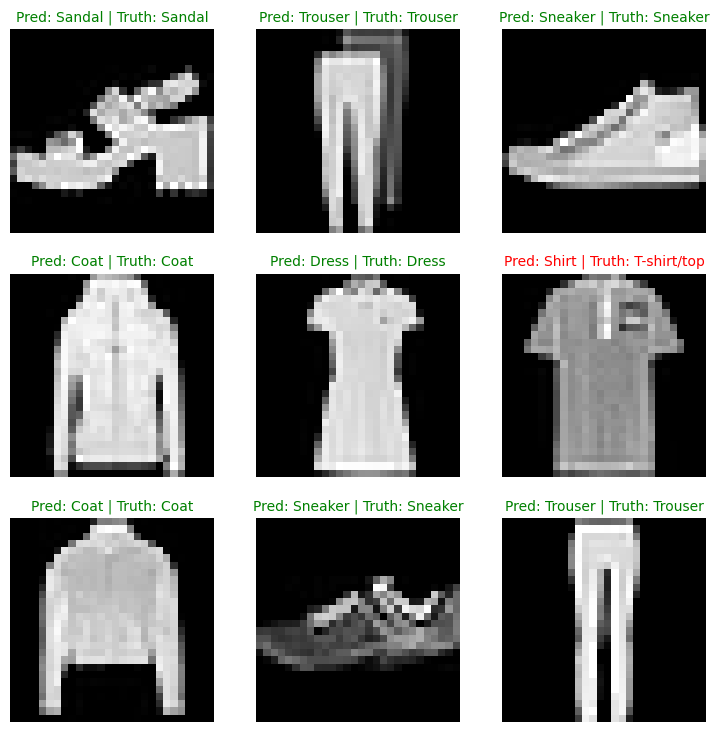

In [24]:
# Plot predictions

plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:01<00:00, 204.58it/s]


In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y, y_pred)
# sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
#             fmt='.2%', cmap='Blues', )
from helper_functions import make_confusion_matrix

# make_confusion_matrix(cf_matrix, figsize=(8,6), cbar=False)

[Confusion matrix reference](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)

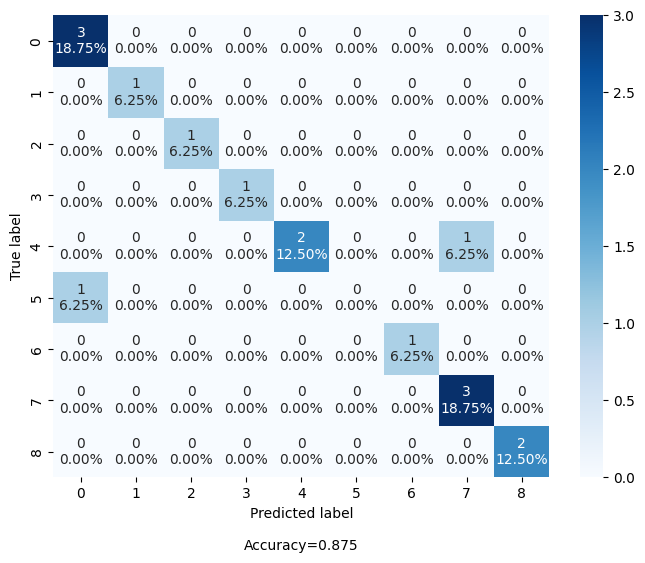

In [27]:
make_confusion_matrix(cf_matrix, figsize=(8,6), cbar=True,sum_stats=True)

In [ ]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

MODEL_NAME = "pytorch_computer_vision_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth
